Read data

In [40]:
import pandas
%matplotlib inline

df = pandas.read_csv("cleandata.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed..0,time_period,time_identifier,geographic_level,country_code,country_name,region_name,region_code,old_la_code,la_name,Phase.type_grouping,new_la_code,FSM,headcount,percent_of_pupils,average_grade
0,0,1,0,202021,Academic year,Local authority,E92000001,England,London,E12000007,203,Greenwich,Total,E09000011,known to be eligible for free school meals (us...,9879,24.637753,56.086989
1,1,2,1,202021,Academic year,Local authority,E92000001,England,London,E12000007,203,Greenwich,Total,E09000011,number of pupils (used for FSM in Performance ...,40097,100.000000,60.000000
2,2,3,2,202021,Academic year,Local authority,E92000001,England,London,E12000007,203,Greenwich,Total,E09000011,Total,44682,100.000000,50.000000
3,3,4,3,202021,Academic year,Local authority,E92000001,England,London,E12000007,204,Hackney,Pupil referral unit,E09000012,FSM eligible pupils taking free school meals,34,53.968254,46.190476
4,4,5,4,202021,Academic year,Local authority,E92000001,England,London,E12000007,204,Hackney,Pupil referral unit,E09000012,infants taken a free school meal on census day,0,0.000000,40.000000


Get distribution of average grades

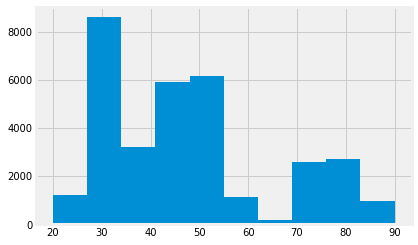

20.0 90.0


In [41]:
import matplotlib.pyplot as plt
plt.hist(df.average_grade.values)
plt.show()

column = df["average_grade"]
max_value = column.max()
min_value = column.min()
df.describe()
print(min_value, max_value)
df = df[df["average_grade"] < 100] # dump extreme values

Check correlation of variables

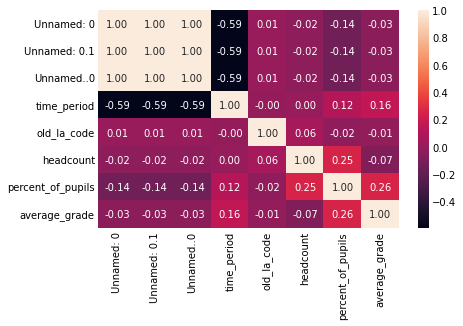

In [42]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

Convert values into labels we can compute for the model
get_grade: converts grades into 1, 2, 3, 4. 1 being the worst grade, 4 being the best
get_fsm: will convert values into a more compact form for one hot-encoding

In [43]:
def get_grade(grade):
    if grade < 50:
        return 1
    elif grade < 60:
        return 2
    elif grade < 80:
        return 3
    else:
        return 4
def get_fsm(fsm):
    if fsm == "known to be eligible for free school meals (used for FSM in Performance Tables)":
        return "KNOWN"
    elif fsm == "known to be eligible for free school meals":
        return "KNOWN_TABLE"
    elif fsm == "infants taken a free school meal on census day":
        return "INFANT"
    elif fsm == "number of pupils (used for FSM in Performance Tables)":
        return "NPUPILS"
    elif fsm == "FSM eligible pupils taking free school meals":
        return "FSM"
    elif fsm == "Eligible since March 23rd 2020":
        return "ELIGIBLE"
    elif fsm == "Total":
        return "TOTAL"
df['GRADE'] = df.apply(lambda row : get_grade(row.average_grade), axis = 1)

df['FSM1'] = df.apply(lambda row : get_fsm(row.FSM), axis = 1)

df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed..0,time_period,time_identifier,geographic_level,country_code,country_name,region_name,region_code,old_la_code,la_name,Phase.type_grouping,new_la_code,FSM,headcount,percent_of_pupils,average_grade,GRADE,FSM1
0,0,1,0,202021,Academic year,Local authority,E92000001,England,London,E12000007,203,Greenwich,Total,E09000011,known to be eligible for free school meals (us...,9879,24.637753,56.086989,2,KNOWN
1,1,2,1,202021,Academic year,Local authority,E92000001,England,London,E12000007,203,Greenwich,Total,E09000011,number of pupils (used for FSM in Performance ...,40097,100.000000,60.000000,3,NPUPILS
2,2,3,2,202021,Academic year,Local authority,E92000001,England,London,E12000007,203,Greenwich,Total,E09000011,Total,44682,100.000000,50.000000,2,TOTAL
3,3,4,3,202021,Academic year,Local authority,E92000001,England,London,E12000007,204,Hackney,Pupil referral unit,E09000012,FSM eligible pupils taking free school meals,34,53.968254,46.190476,1,FSM
4,4,5,4,202021,Academic year,Local authority,E92000001,England,London,E12000007,204,Hackney,Pupil referral unit,E09000012,infants taken a free school meal on census day,0,0.000000,40.000000,1,INFANT


Do one hot Encoding for grades and FSM

In [44]:
features = pandas.get_dummies(df["FSM1"])
print(features.head())
features["percentage"] = df["percent_of_pupils"]
print(features.head())
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(df['GRADE'])
# Remove the labels from the features
# axis 1 refers to the columns
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

   ELIGIBLE  FSM  INFANT  KNOWN  KNOWN_TABLE  NPUPILS  TOTAL
0         0    0       0      1            0        0      0
1         0    0       0      0            0        1      0
2         0    0       0      0            0        0      1
3         0    1       0      0            0        0      0
4         0    0       1      0            0        0      0
   ELIGIBLE  FSM  INFANT  KNOWN  KNOWN_TABLE  NPUPILS  TOTAL  percentage
0         0    0       0      1            0        0      0   24.637753
1         0    0       0      0            0        1      0  100.000000
2         0    0       0      0            0        0      1  100.000000
3         0    1       0      0            0        0      0   53.968254
4         0    0       1      0            0        0      0    0.000000


Check correlation of variables again

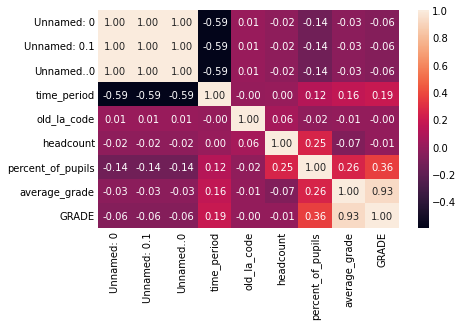

In [45]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [46]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (24496, 8)
Training Labels Shape: (24496,)
Testing Features Shape: (8166, 8)
Testing Labels Shape: (8166,)


In [47]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.09 degrees.
Accuracy: 96.86 %.


Variable: KNOWN_TABLE          Importance: 0.6
Variable: percentage           Importance: 0.23
Variable: ELIGIBLE             Importance: 0.12
Variable: KNOWN                Importance: 0.03
Variable: NPUPILS              Importance: 0.02
Variable: FSM                  Importance: 0.0
Variable: INFANT               Importance: 0.0
Variable: TOTAL                Importance: 0.0


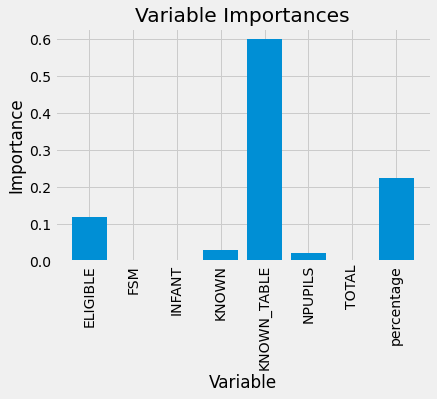

In [48]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');